<a href="https://colab.research.google.com/github/sarthak-314/100-Days-in-Data/blob/master/4.1%20Data%20Exploration%20(Code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__DATA EXPLORATION__
***
# __df_code__ : Analysing the time spent coding 



In [ ]:
#Useful Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)

#Path to my Google Drive
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
#Gotta get the dataframes I saved in the previous notebook
DF_PATH = './100D Data/Final Dataframes'
df_code = pd.read_csv(os.path.join(DF_PATH, 'df_code'))
df_smartwatch = pd.read_csv(os.path.join(DF_PATH, 'df_smartwatch'))
df_date = pd.read_csv(os.path.join(DF_PATH, 'df_date'))

In [ ]:
df_date = df_date.dropna()
first_day = df_date.iloc[0]['day_number']
last_day = df_date.iloc[-1]['day_number']
TOTAL_DAYS = int(last_day - first_day + 1)
WORKING_DAYS = df_code.date.nunique()
# HALF_DAYS = df_date.is_halfday.sum()

print('\x1b[0mTotal days of the expriment :\x1b[32m', TOTAL_DAYS, 'days')
print('\x1b[0mTotal number of days recorded :\x1b[32m', WORKING_DAYS, 'days')
print('\x1b[0mTotal number of breaks taken :\x1b[32m', TOTAL_DAYS - WORKING_DAYS)
# print('\x1b[0mTotal number of full working days :\x1b[32m', WORKING_DAYS - HALF_DAYS, 'days')
# print('\x1b[0mTotal number of half working days:\x1b[32m', HALF_DAYS, 'days')

Total days of the expriment : 101 days
Total number of days recorded : 88 days
Total number of breaks taken : 13


The 100 Day experiment lasted from **23th August** to **2nd December** - a total of **98 days**.
In those 6 days I worked for **6 days** - **5** full working days and **1** half day while taking **2** days off. So far so good!


In [ ]:
df_code.isna().sum()

starting_time      0
duration(hr)       0
working_on         0
stack             26
position          11
context          217
productivity       0
part_of_day        0
date               0
dtype: int64

In [ ]:
def drop_invalid_values(x): 
    if '..' in str(x): 
        return None
    try: 
        return float(x)
    except: 
        return None
    
df_code['productivity'] = df_code.productivity.apply(drop_invalid_values)
df_code = df_code.dropna(subset=['duration(hr)', 'productivity'])

In [ ]:
#Let's take a look at df_code
df_code.head()

,starting_time,duration(hr),working_on,stack,position,context,productivity,part_of_day,date
0,5:15 AM,1.00,Aws,Dev-Ops,Standing,Learn,8.5,early morning,23rd August
1,8:00 AM,2.25,100D,Data Science,Sitting,NaN,7.5,early morning,23rd August
2,11:00 AM,1.00,Leetcode,Algorithms & DS,Standing,NaN,8.0,late morning,23rd August
3,12:30 PM,1.00,Book Store,Back End,Sitting,Refactoring,7.0,late morning,23rd August
4,3:00 PM,2.00,100D,Data Science,Sitting,Write,7.5,evening,23rd August


**df_code** is a dataframe with 9 columns

Each row in the dataframe is an entry/recording which corrosponds to a coding session

The *starting_time, duration, productivity* etc. are the features that describe that particular session

In [ ]:
#descriptive stats
#TODO: Look at that categorical describe 
df_code.describe()

,duration(hr),productivity
count,416.000000,416.000000
mean,1.171074,7.134615
std,0.633366,0.547638
min,0.250000,6.000000
25%,0.750000,7.000000
50%,1.000000,7.000000
75%,1.500000,7.500000
max,3.750000,8.500000


* The stats tell me that I had a total of **400** coding sessions in **80** days with an avg session lasting **1.17 hrs**.

* Half of my sessions are longer than an hour and a forth are longer than 1.5 hrs.

* Furthermore there is a considerable variation between the length (but not much in the productivity) of the sessions




Let's see how the coding sessions are spread out visually

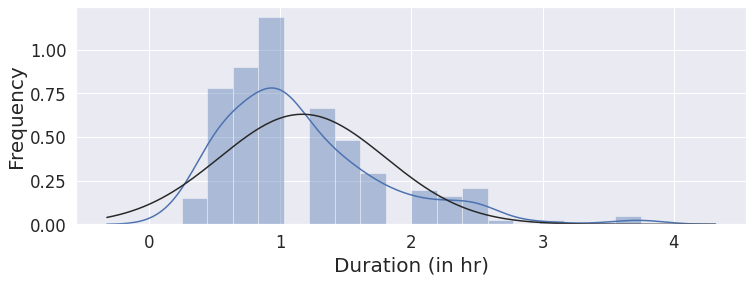

In [ ]:
from scipy.stats import norm
plt.subplots(figsize=(12, 4))
g = sns.distplot(df_code['duration(hr)'], fit=norm)
g.set_xlabel('Duration (in hr)',fontsize=20)
_ = g.set_ylabel('Frequency',fontsize=20)

The distribution plot closely follows a normal distribution. The graph tells me that most of my coding sessions last 1-2 hours and that I tend to code for longer durations early morning as compared to evening.


### How **much time** do I spend coding on an average day?
When I started this project, my aim was to code for 6hrs/day

I am guessing that is pretty close to the actual amount.

Let's find out

In [ ]:
total_time_spent_coding = df_code['duration(hr)'].sum()
print("Total time spent coding in\x1b[32m", TOTAL_DAYS, "\x1b[0mdays is : \x1b[32m" + str(int(total_time_spent_coding)) + " hours \x1b[0m")
avg_time = total_time_spent_coding / TOTAL_DAYS

grouped = df_code.groupby('date')['duration(hr)'].sum()
df_date = df_date.dropna()

print('\x1b[0mTime spent coding on average day : \x1b[32m', round(avg_time, 2), ' hrs/day \n')
print('\x1b[0mTotal working days : \x1b[32m', int(len(grouped)) )
print('\x1b[0mTotal time spent coding on an\x1b[90m working\x1b[0m day :\x1b[32m', round(total_time_spent_coding / len(grouped), 2), 'hrs / day')


Total time spent coding in 101 days is : 487 hours 
Time spent coding on average day :  4.82  hrs/day 

Total working days :  87
Total time spent coding on an working day : 5.6 hrs / day


Total **468 hours** spent coding in last 98 days. I have to say I am a little bit impressed with myself that i was able to pull this off, altough it was at the expense of reading and exercising goals.


I also had some **more specific coding goals**. Let's see if acheived them

***
### That's **how** much did I code. But **what** exactly did I code?
Where does my coding time go? On Projects? On Learning stuff?



Almost all of the time I spend coding can be divided into one of the three categories
* __Projects__ : I have 3 main projects I spend most of my time on. Sometimes I also work on side projects to practice a specific skill
* __Learning__ : I have a lot of free time and very little work so I also spend my time learning new technologies/frameworks
* __Leetcode__ : The Leetcode grind for my Algo & DS skills. I absolutely suck at verbal communication so my best hope for getting an internship is to be exceptional at technical skills


When I started this project I had a daily target for **3 hrs** on project, **2 hrs** on learning and **1 hr** on leetcode.

For 100 days the totals should amount to 300 hrs of project, 200 hrs of learning and 100 hrs of leetcode

Let's see how it held up


Total time spent on working on projects is : 220.17 hours
Total time spent on leetcode is : 128.0 hours
Total time spent on learning new tech is : 22.75 hours
------------------------------------------------------------------------------------------


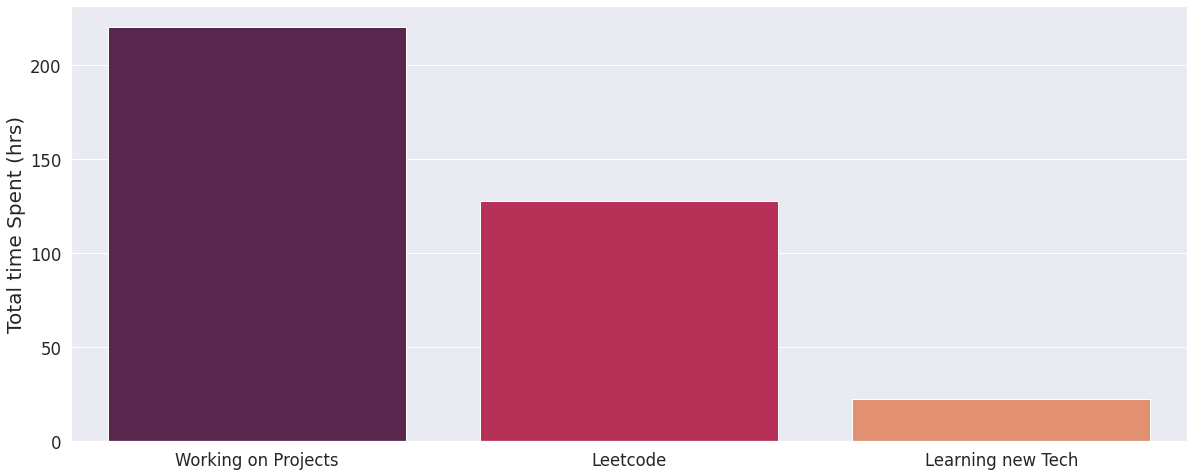

In [ ]:
#For each entry, I find out weather I am working on project, learning new tech or doing leetcode
PROJECTS = ['Amatron', '100D', 'Airbnb', '180D', '180 D', '100 D']
is_project = df_code.working_on.apply(lambda x : x in PROJECTS)
is_learning = df_code.context.apply(lambda x : x == 'Learn')
is_leetcode = df_code.working_on.apply(lambda x : x == 'Leetcode')

time_spent = []
CATEGORIES = ['Working on Projects', 'Leetcode', 'Learning new Tech']
for df_bool, cat in zip([is_project, is_leetcode, is_learning], CATEGORIES):
    total_time_spent = df_code[df_bool]['duration(hr)'].sum()
    time_spent.append(total_time_spent)
    print('\x1b[0mTotal time spent on', cat.lower(), 'is :\x1b[32m', round(total_time_spent, 2), 'hours')

print('------------------------------------------------------------------------------------------')
fig, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot(CATEGORIES, time_spent, palette='rocket')
_ = g.set_ylabel('Total time Spent (hrs)',fontsize=20)

#TODO: Arrange them with most to least 

This is way off the 3hr-2hr-1hr target I had in mind!

I overshot my goal in projects and leetcode but didn't spend enough time learning new tech.

My theory is that if I'm working long hours, I find it easier to do development than learning new stuff from scratch. So I took the easier path and replaced learning time with project time.

Also during the last few weeks, I started gearing up on interview prep by practicing more leetcode. That explains the high leetcode time.


###**Sleep** and **code** - how do they relate?
(Future Sarthak : Ignore this section, still a work in progress)
I have a fairly irregular sleep. Sometimes I sleep 5 hours, sometimes I sleep 9 hours.

It's hard for me to function without 7 hours of sleep, hence I expect to see a high positive correletation between quality and quantity of code vs sleep

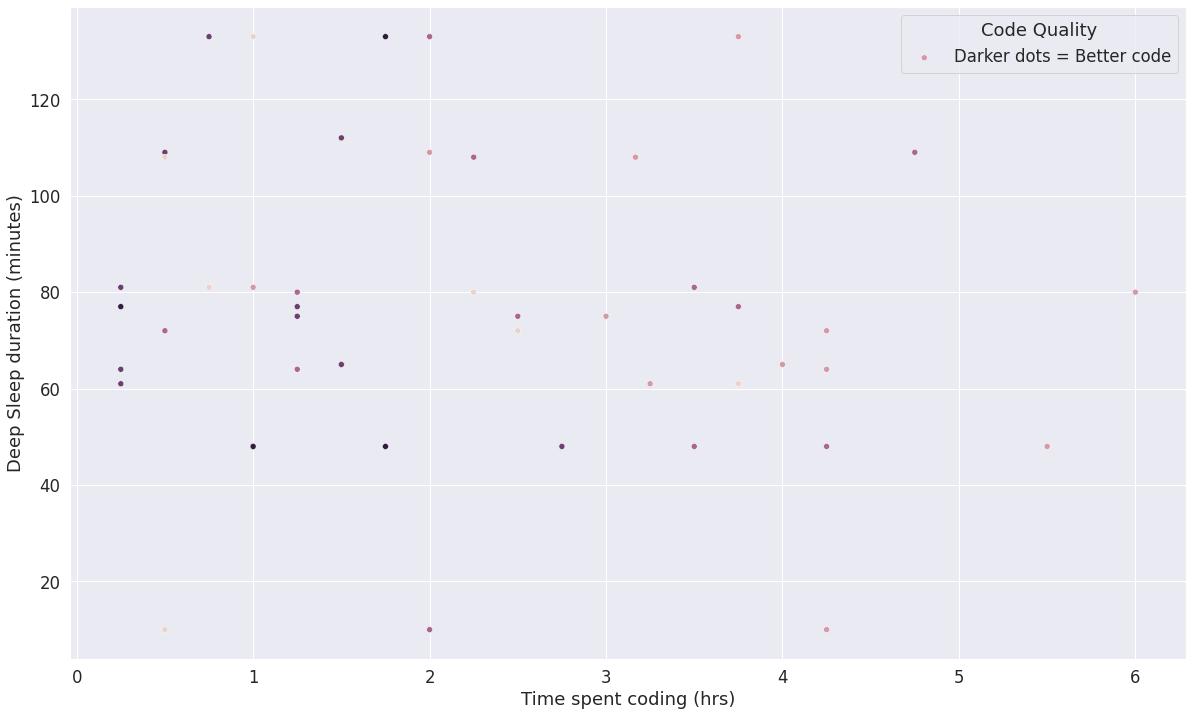

In [ ]:
plt.figure(figsize=(20, 12))
x = df_smartwatch.merge(df_code.groupby(['date', 'productivity'])['duration(hr)'].sum().reset_index(), on='date')
g = sns.scatterplot(x='duration(hr)', y='deep_sleep', hue='productivity', data=x, legend=False)
g.set_xlabel('Time spent coding (hrs)')
g.set_ylabel('Deep Sleep duration (minutes)')
plt.legend(title='Code Quality', labels=['Darker dots = Better code'])
plt.show(g)

Higher amount of deep sleep corrosponds to both higher quality and quantity of code (see dots in upper right corner) 

### How *lazy* am I?

How much time do I spend *sitting* as compared to *standing* while coding?

My aim was to spend at least *half* of my coding time on a standing desk.

I don't know wheather I acheived or not, but I am guessing it should be close to the goal

What does the data say?

 Total time spent sitting on a chair : 317.17 hours
 Total time spent on a standing desk : 122.0 hours
 Percentage of time I was standing : 27 %
----------------------------------------------------


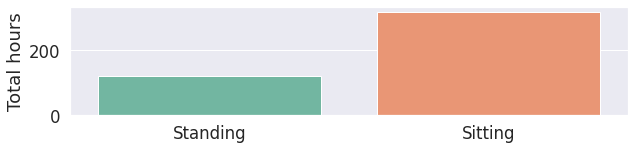

In [ ]:
df_sitting = df_code[df_code['position'] == 'Sitting']
df_standing = df_code[df_code['position'] == 'Standing']
total_sitting_time = df_sitting['duration(hr)'].sum()
total_standing_time = df_standing['duration(hr)'].sum()

print(' Total time spent sitting on a chair :\x1b[32m', round(total_sitting_time, 2), 'hours')
print('\x1b[0m Total time spent on a standing desk :\x1b[32m', round(total_standing_time), 'hours')
print('\x1b[0m Percentage of time I was standing :\x1b[32m', int(total_standing_time / (total_standing_time + total_sitting_time) * 100), '%')
print('----------------------------------------------------')
plt.subplots(figsize=(10, 2))
g = sns.barplot(['Standing', 'Sitting'], [total_standing_time, total_sitting_time], palette='Set2')
_ = g.set_ylabel('Total hours')

Good to see that I spend 30% of my time standing :)

### Does standing makes me *smarter*?
Yeah, you read the question right. I want to know if spending more time standing helps my productivity. 
I found for myself that I think more creatively while I am standing and doing something mildly physical like throwing a ball against a wall or fidgeting as compared to sitting in a chair

That's the reason I am almost always on an standing desk while I'm working on a hard / abstract problem  or while I'm writing an article

I expect to see high positive correlation between efficiency and time spent standing

See more at - https://news.stanford.edu/2014/04/24/walking-vs-sitting-042414

(Future Sarthak : Why does everything I write sound so pretentious?)

Standing to sitting ratio for Very High productivity is : 3.29
Standing to sitting ratio for High productivity is : 7.58
Standing to sitting ratio for Moderate-High productivity is : 0.46
Standing to sitting ratio for Moderate productivity is : 0.17
Standing to sitting ratio for Low productivity is : 0.05
----------------------------------------------------------------------------------------------------


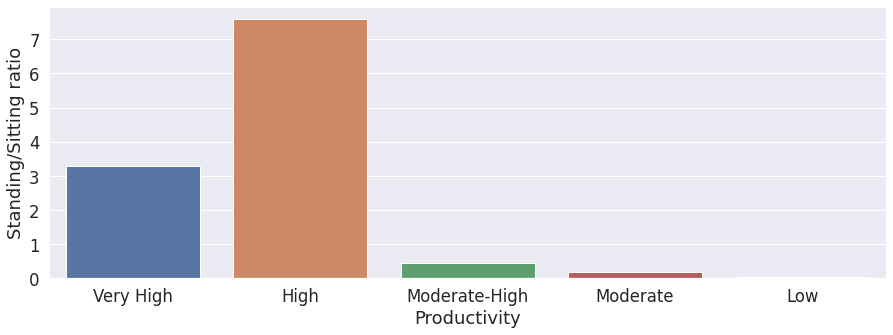

In [ ]:
grouped = df_code.groupby(['position', 'productivity'])['duration(hr)'].sum()
EFFICIENCY = {8.5: 'Very High', 8:'High', 7.5: 'Moderate-High', 7: 'Moderate', 6.5: 'Low'}
xlist, ylist = [], []
for n, e in EFFICIENCY.items():
    if ('Standing', n) in grouped.index:
        standing = grouped['Standing', n]
    else: continue
    if ('Sitting', n) in grouped.index:
        sitting = grouped['Sitting', n]
    else: continue
    ratio = round(standing / sitting, 2)
    print('\x1b[0mStanding to sitting ratio for\x1b[32m', e, '\x1b[0mproductivity is :\x1b[32m', ratio)
    xlist.append(e)
    ylist.append(ratio)

print('-'*100)

plt.subplots(figsize=(15, 5))
g = sns.barplot(xlist, ylist)
g.set_xlabel('Productivity')
_ = g.set_ylabel('Standing/Sitting ratio')

Ha! The ratio for standing to sitting is highest for Very high productivity (8.5 on productivity scale) and keeps decreasing from there.



### What is my favourite part of the stack?

Distribution of development time I spend in Machine Learning, Backend, Frontend, Leetcoding, Writing Data Science


I see myself as a Machine Learning Software Engineeer, so ideally my development time should be something like -  

ML > Back end > Data Science > Front end > UI

But my guess is - 
Data Science > Front End > Machine Learning > Back End 

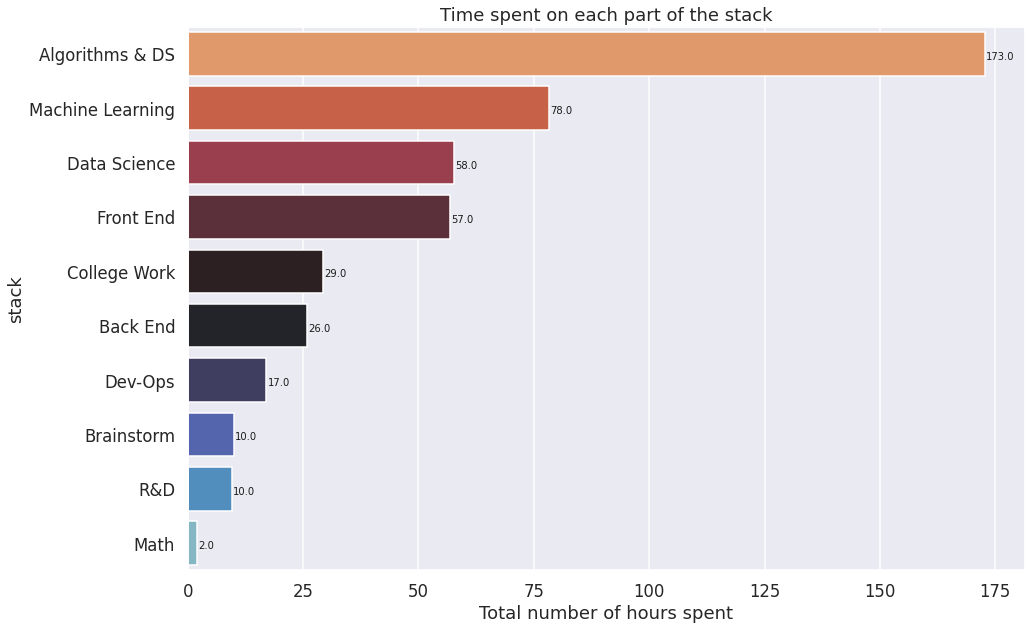

In [ ]:
#[Does not include the time I spent learning new stuff and on leetcode]
sns.set_context('talk')
time_spent = df_code.groupby('stack')['duration(hr)'].sum()
time_spent = time_spent.reset_index().sort_values('duration(hr)', ascending=False).set_index('stack')
plt.figure(figsize=(15,10))
ax = sns.barplot(time_spent['duration(hr)'], time_spent.index, palette='icefire_r')
ax.set_title("Time spent on each part of the stack")
ax.set_xlabel("Total number of hours spent")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Very cool

***
## An **Average** Day
What does an average day looks like in the life of Sarthak Bhatt?




**How does my day change as time progresses?**

4:15  PM


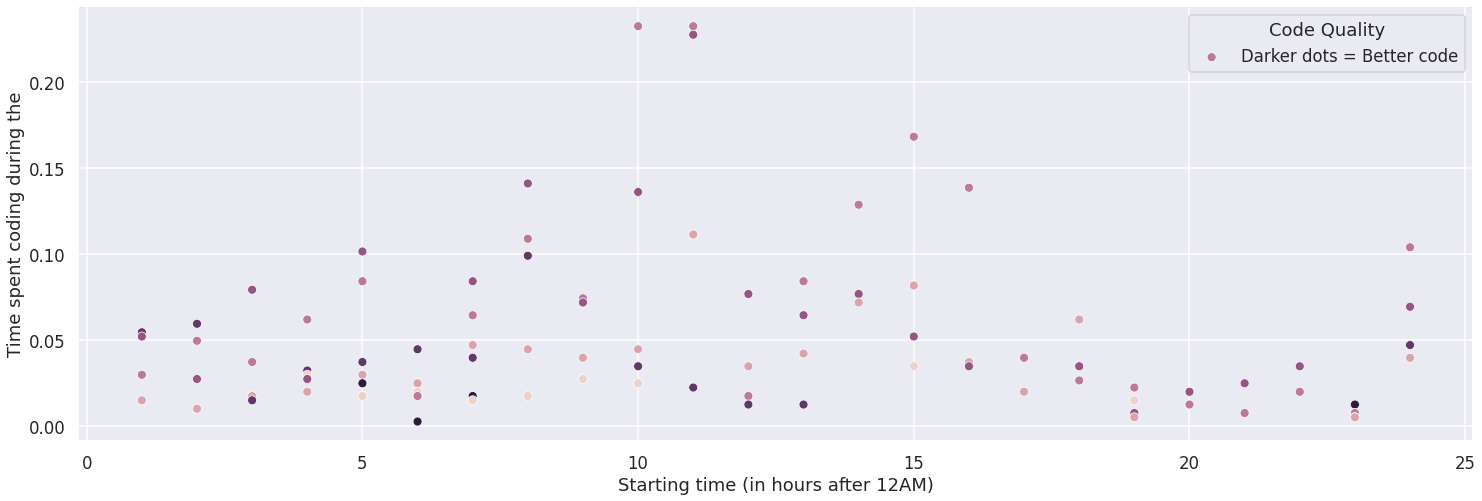

In [ ]:
#Round down staring_time to starting_hour to reduce the noise
def get_starting_hour(x):
    if ' ' in str(x):
        try: 
            time, am_or_pm = str(x).split(' ')
        except: 
            print(x)
            return 10

    else: return float('NaN')
    is_am = am_or_pm == 'AM'
    hour = int(time.split(':')[0])
    return hour if is_am else hour + 12
df_code['starting_hour'] = df_code.starting_time.apply(get_starting_hour)
grouped = df_code.groupby(['starting_hour', 'productivity'])['duration(hr)'].sum().sort_values(ascending=False).apply(lambda x : x / TOTAL_DAYS)
df_code.drop('starting_hour', inplace=True, axis=1)

grouped = grouped.reset_index()
plt.subplots(figsize=(25, 8))
g = sns.scatterplot(x='starting_hour', y='duration(hr)', hue='productivity', data=grouped)
g.set_xlabel('Starting time (in hours after 12AM)')
g.set_ylabel('Time spent coding during the')
plt.legend(title='Code Quality', labels=['Darker dots = Better code'])
plt.show(g)


The time starts at 0 (12:00 AM) and ends at 24 (12:00 PM). 3 main points to observe:

* Almost all of the dots are between 5 (5:00 AM) and 20 (8:00 PM). That's because I wake up around 5 AM and sleep around 8 PM

* Most of the **darker dots** are concentrated 5 to 9 mark. That's between 5 AM to 10 AM - I'm **more productive** during early morning as compared to any other time of the day

* The dots **rise the highest** around x=10. That's 10 AM - usually after I have my breakfast and a cup of coffee. I turn into a coding machine after drinking coffee and code for extended hours


### **Over the 100 days...**

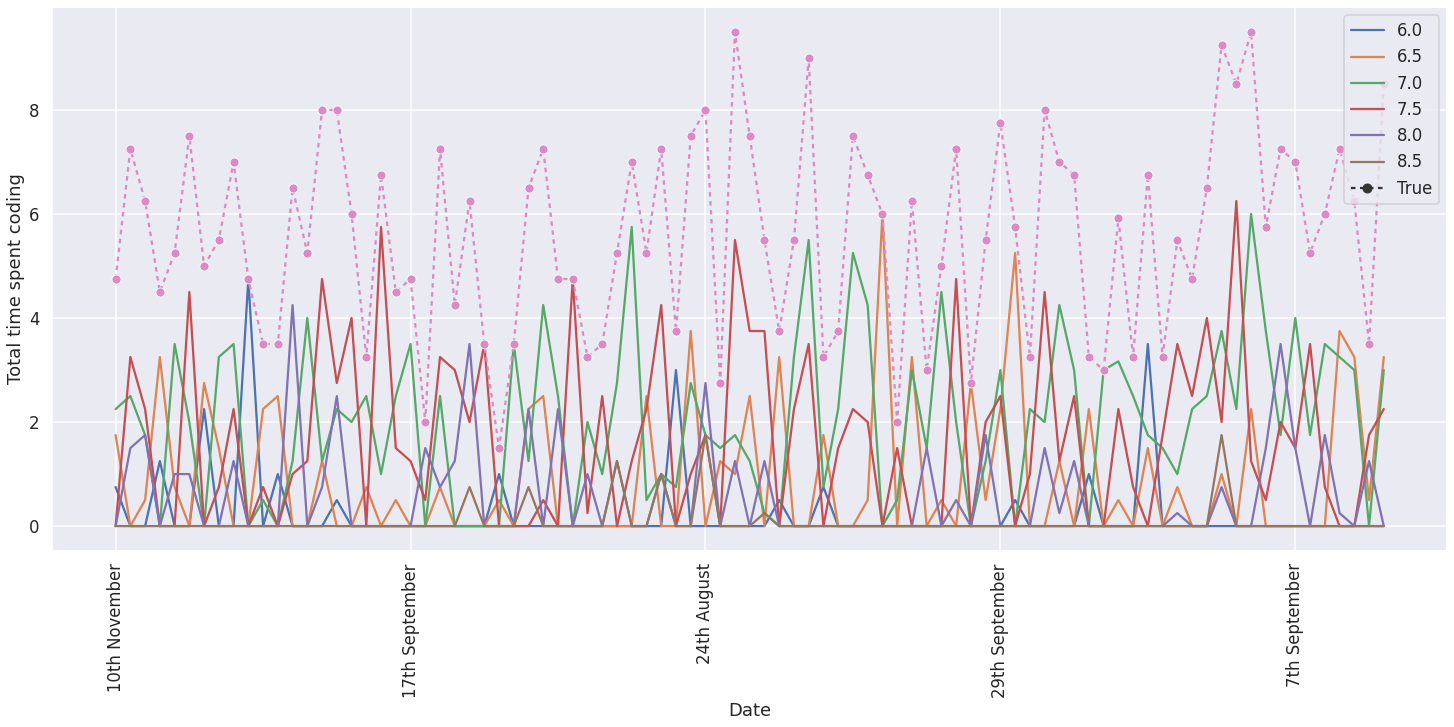

In [ ]:
_, ax = plt.subplots(figsize=(25, 10))
df_code.groupby(['date', 'productivity'])['duration(hr)'].sum().unstack().fillna(0).plot(ax=ax)
x = df_code.groupby('date')['duration(hr)'].sum().reset_index()
g = sns.lineplot(x=x['date'], y=x['duration(hr)'], style=True, dashes=[(2, 2)], markers=['o'], ax=ax)
g.set_xlabel('Date')
g.set_ylabel('Total time spent coding')
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Plotting that was easy! The brown dotted line is the total time spent coding. 



The other color lines show the amount of time spent coding with "x" productivity where "x" increases from 6.5 to 8.5 

In [ ]:
df_code.head()

,starting_time,duration(hr),working_on,stack,position,context,productivity,part_of_day,date
0,5:15 AM,1.00,Aws,Dev-Ops,Standing,Learn,8.5,early morning,23rd August
1,8:00 AM,2.25,100D,Data Science,Sitting,NaN,7.5,early morning,23rd August
2,11:00 AM,1.00,Leetcode,Algorithms & DS,Standing,NaN,8.0,late morning,23rd August
3,12:30 PM,1.00,Book Store,Back End,Sitting,Refactoring,7.0,late morning,23rd August
4,3:00 PM,2.00,100D,Data Science,Sitting,Write,7.5,evening,23rd August


In [ ]:
#Amount of time coding vs Exercising vs Sleeping
#Amount of time learning vs Projects vs Leetcode vs Other
#Amount of time in 7 vs 7.5 vs 8 vs above vs below
# What am I doing in my most productive hours? same for least productive hours
#Amount of time in amatron vs 100d vs airbnb
#Amount of time sitting vs standing
#Time passing vs average code quality
#Time passing vs siiting / standing
#Time passing vs what I like to do
#Weekday day vs time in buckets
#Week by week degrade in performace
#Day number vs total time spent coding
#DATA CLEANING FOR EXERCISE - measure time in minutes and shgit, also make loitering time in the morning

###Over 100 days

---
---
#**More Exploration !**
The main part of the notebook is over. The notebook below this is me nerding out about data. If I find any intersting results, I move it above the line. Warning: Sphagetti code ahead!

Replacing 'duration(hr)' column with just 'duration' because I keep forgetting the '(hr)' part


In [ ]:
df_code = df_code.rename({'duration(hr)' : 'duration'}, axis=1)

Also changing the variable name *df_code* to *df* beacuse '_code' is 5 more words to type


In [ ]:
df = df_code

What am I doing in my most productive hours?

In [ ]:
df[df.productivity >= 8]['working_on'].value_counts(normalize=True).apply(lambda x : str(round(100*x, 1)) +'%')

100D        35.3%
Aws         23.5%
Amatron     17.6%
Leetcode    17.6%
Docker       5.9%
Name: working_on, dtype: object

What am I doing in my least productive hours?


In [ ]:
df[df.productivity <= 7]['working_on'].value_counts(normalize=True).apply(lambda x : str(round(100*x, 1)) +'%')


100D          44.4%
Amatron       36.5%
Internship     7.9%
Leetcode       3.2%
Scratch        1.6%
Aws            1.6%
Amaton         1.6%
Docker         1.6%
Book Store     1.6%
Name: working_on, dtype: object

How are numerical values in df related?

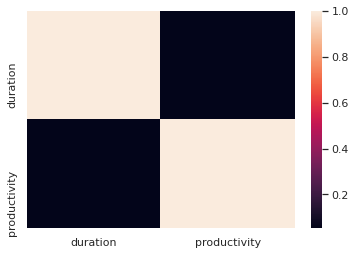

In [ ]:
_ = sns.heatmap(df.corr())

Plotting productivity vs time points (Earlier approach).

I later found out that if make a another variable - starting_hour, I could do the same much more compactly, altough I would have to give up on some fine precision.

In [ ]:
"""
I track my time in 15 minute intervals. All of my starting_points in df_code are a multiple of 15 minutes
like 8:15 AM, 5:30 PM, 6:45 AM, 7:00 PM and not 8:07 AM or 6:53 PM

I now divide my time into time_points. Each time_point is a moment of time ex. 8:15 AM is a time_point

In a day, for a time_point I could either be productive or not. 
Ex. If I code from 8:00 AM to 9:00 AM, I consider time points 8:00 AM, 8:15 AM, 8:45 AM as productive. 
And the time_points I don't spend coding will be non productive. 
So, for a day I now have a list of time_points with a binary value.

And if I sum this value over 100 days, I can get average value of productivity for a time_point.
Ex. If I was coding 45 / 100 days at 8:15 AM, and 15 / 100 days at 7:00 PM, 8:15 AM is thrice as productive
as 7:00 PM

I usually code between somewhere between 5:00 AM to 8:00 PM so I only consider time_points between them

Getting a list of all the time points between 5:00 AM and 8:00 PM. This will be my x - axis for the line plot
For the y-axis I will count how many days I was coding at that time point
And then make a lineplot out of it.
"""
# gives me all the time points between 5:00 AM upto 12:00 PM in 15 minute intervals
morning_time_list = []
for hour in range(5, 12):
    for m in [':00 AM', ':15 AM', ':30 AM', ':45 AM']: 
        time = str(hour) + m
        morning_time_list.append(time)
noon_time_list = ['12:00 PM', '12:15 PM', '12:30 PM', '12:45 PM']
# gives me all the time points between 12:00 PM upto 8:00 PM 
evening_time_list = []
for hour in range(1, 8):
    for m in [':00 PM', ':15 PM', ':30 PM', ':45 PM']:
        time = str(hour) + m
        evening_time_list.append(time)
all_time_points_list = morning_time_list + noon_time_list + evening_time_list

print('Time points : ', all_time_points_list[:5], '..... upto 8:00 PM')

Time points :  ['5:00 AM', '5:15 AM', '5:30 AM', '5:45 AM', '6:00 AM'] ..... upto 8:00 PM


Made the x-axis, now gotta make the y-axis

In [ ]:
number_of_days_coded = [0] * len(all_time_points_list)
for start_time, duration in df_code.dropna().groupby('starting_time').duration:
    try:
        intervals = int(duration * 4) # 1 hour has 4 * 15-minute intervals
        tp_idx = all_time_points_list.index(start_time)
        for i in range(tp_idx, tp_idx + intervals):
            number_of_days_coded[i] += 1
    except:
        pass

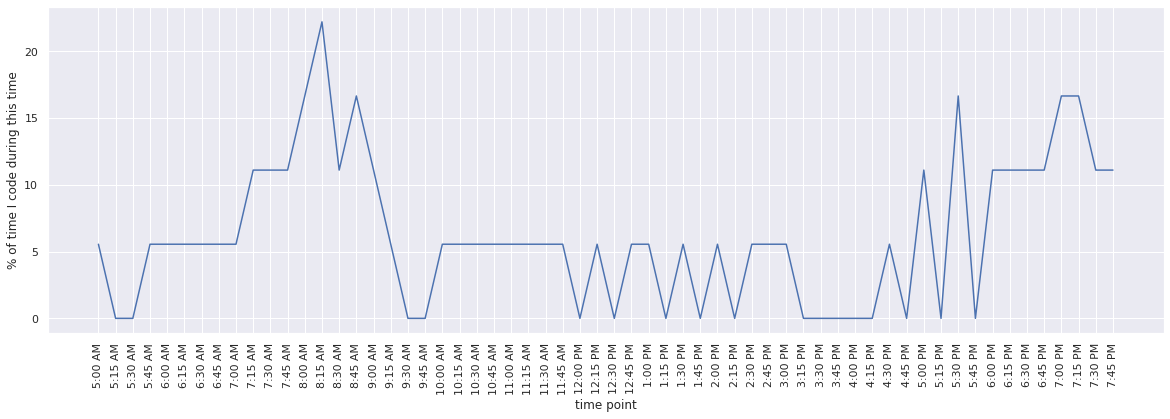

In [ ]:
ax = plt.figure(figsize=(20, 6))
percentage_of_days = [x * 100 / TOTAL_DAYS for x in number_of_days_coded]
sns.set(style='darkgrid')
ax = sns.lineplot(x=all_time_points_list, y = percentage_of_days)
ax.set(xlabel='time point', ylabel='% of time I code during this time')
_ = ax.set_xticklabels(labels=all_time_points_list, rotation=90)

Week vs Week

In [ ]:
code_per_week = df.merge(df_date[['week', 'date']]).groupby('week').duration.sum().apply(lambda x : str(round(x, 2))+' hours')
code_per_week

week
1     39.5 hours
2    39.42 hours
3    39.25 hours
Name: duration, dtype: object

In [ ]:
days_in_week = df_date.week.value_counts()
days_in_week

2    6
1    6
3    5
Name: week, dtype: int64

Where do I spend my longest hours?

In [ ]:
df[df.duration >= 2]['working_on'].value_counts(normalize=True).nlargest(3).apply(lambda x : str(round(100*x, 1)) +'%')

100D       53.8%
Amatron    30.8%
Scratch     7.7%
Name: working_on, dtype: object

In [ ]:
df.head()

,starting_time,duration,working_on,stack,position,context,productivity,part_of_day,date
0,5:15 AM,1.00,Aws,Dev-Ops,Standing,Learn,8.5,early morning,23rd August
1,8:00 AM,2.25,100D,Data Science,Sitting,NaN,7.5,early morning,23rd August
2,11:00 AM,1.00,Leetcode,NaN,Standing,NaN,8.0,late morning,23rd August
3,12:30 PM,1.00,Book Store,Back End,Sitting,Refactoring,7.0,late morning,23rd August
4,3:00 PM,2.00,100D,Data Science,Sitting,Write,7.5,evening,23rd August
